# Classification Module
Within this module we will predict if the flight is going to be delayed or not and classify them into those two categories

We will first work with unsampled data from the previous module [Data-Preprocessing, merging the flight data and weather data](https://github.com/GV-9wj/Flight_Delay_Prediction/blob/master/Datapreprocessing3_Merging_Data.ipynb).

After we have seen the classification reports for these modules we will move onto sampled data. We will work with Undersampling and oversampling(SMOTE).

#### Objectives:
1. To classify the given flight as delayed or not using classification models.
2. Run the classification models on unsampled data and print the report for each model.
3. Run the classification models on undersampled data and print the report for each model.
4. Run the classification models on oversampled data and print the report for each model.

#### Classification models used:
1. Logistic regression : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. Random Forest : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
3. Extra trees : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
4. Decision Trees : [LOOKUP](https://scikit-learn.org/stable/modules/tree.html)
5. Gradient Boosting Classifier : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
6. XGboost Classifier : [LOOKUP](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

In [1]:
# First let us import all the different libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Looking at the dataframe
Let us look at the dataframe for a little bit of insight into the data

In [2]:
# Readinbg the file 
df = pd.read_csv("Data/Merged_Flight_Weather.csv", index_col = 0)
df = df.drop(columns=['Unnamed: 0.1', 'date', 'FlightDate','ArrTime','ArrDelayMinutes','CRSArrTime','DeptTime', 'Year'])
df.head()

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ArrDel15,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,DestAirportID,Month,Origin,OriginAirportID,...,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,airport
0,0.0,745,1,0.0,0.0,741.0,12478,1,SEA,14747,...,10,1030,0,23,8,34,29,65,800,SEA
1,1.0,820,1,0.0,1.0,821.0,14107,1,SEA,14747,...,10,1030,0,23,8,34,29,65,800,SEA
2,0.0,759,1,0.0,0.0,754.0,11292,1,SEA,14747,...,10,1030,0,23,8,34,29,65,800,SEA
3,0.0,738,1,0.0,2.0,740.0,12266,1,SEA,14747,...,10,1030,0,23,8,34,29,65,800,SEA
4,0.0,745,1,0.0,0.0,742.0,10397,1,SEA,14747,...,10,1030,0,23,8,34,29,65,800,SEA


In [3]:
# We look at the colums first then the shape
df.columns

Index(['ArrDel15', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'DestAirportID', 'Month', 'Origin', 'OriginAirportID',
       'Quarter', 'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time', 'airport'],
      dtype='object')

In [4]:
# Now the shape of the dataframe
df.shape

(1873584, 25)

In [5]:
# Check for missing valuiesa
df.isna().sum()

ArrDel15           0
CRSDepTime         0
DayofMonth         0
DepDel15           0
DepDelayMinutes    0
DepTime            0
DestAirportID      0
Month              0
Origin             0
OriginAirportID    0
Quarter            0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
airport            0
dtype: int64

In [6]:
df["Origin"] = df["Origin"].astype('category')
df["airport"] = df["airport"].astype('category')
df["Origin"] = df["Origin"].cat.codes
df["airport"] = df["airport"].cat.codes
df.head()

,ArrDel15,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,DestAirportID,Month,Origin,OriginAirportID,...,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,airport
0,0.0,745,1,0.0,0.0,741.0,12478,1,13,14747,...,10,1030,0,23,8,34,29,65,800,13
1,1.0,820,1,0.0,1.0,821.0,14107,1,13,14747,...,10,1030,0,23,8,34,29,65,800,13
2,0.0,759,1,0.0,0.0,754.0,11292,1,13,14747,...,10,1030,0,23,8,34,29,65,800,13
3,0.0,738,1,0.0,2.0,740.0,12266,1,13,14747,...,10,1030,0,23,8,34,29,65,800,13
4,0.0,745,1,0.0,0.0,742.0,10397,1,13,14747,...,10,1030,0,23,8,34,29,65,800,13


In [7]:
df.columns

Index(['ArrDel15', 'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes',
       'DepTime', 'DestAirportID', 'Month', 'Origin', 'OriginAirportID',
       'Quarter', 'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time', 'airport'],
      dtype='object')

##### Feature exploration
Since there are no missing values we can continue further and look at the corellation between various features of the dataframe

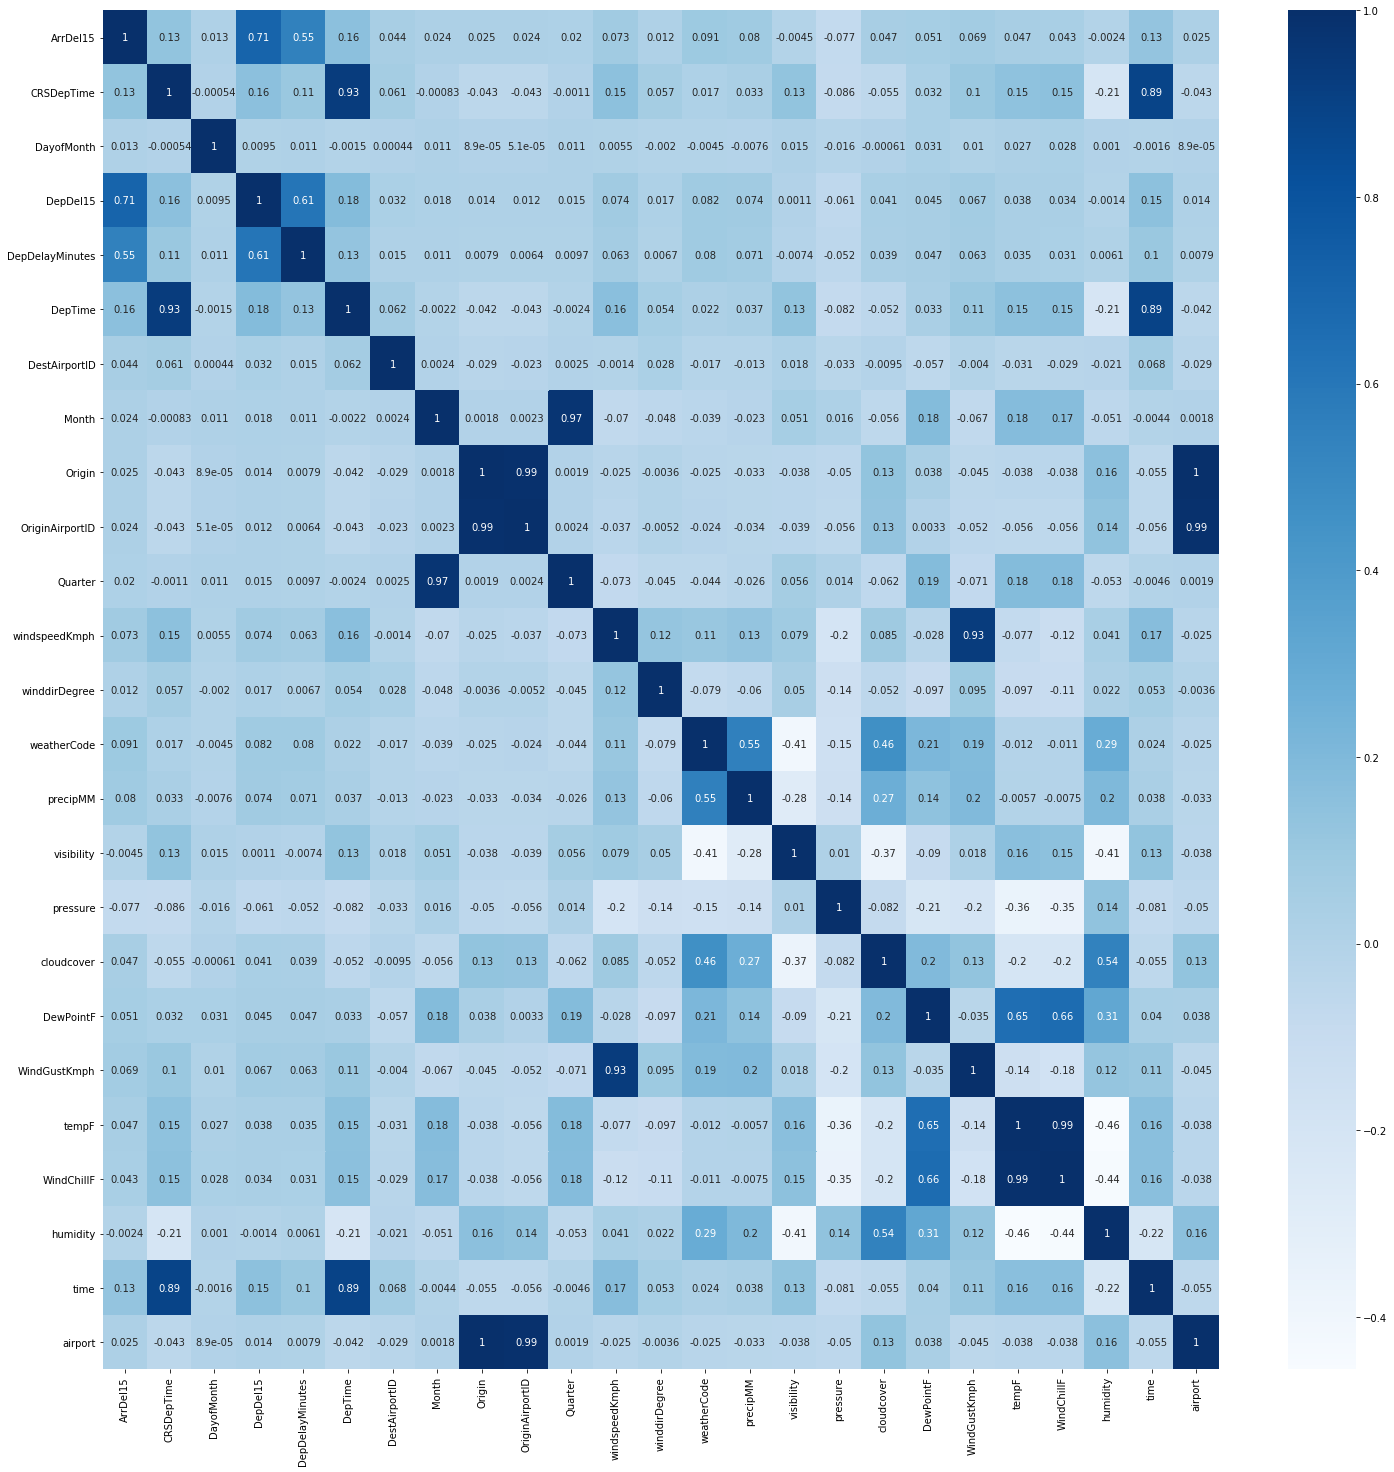

In [8]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

# Un-Sampled Data
We will work the above classifier models using unsampled data, i.e data that has not be altered and predict if the flight is on time or delayed

In this dataframe the variable we need to predict is '`ArrDel15` and therefore we need to divide it into two variables:
* `X` - the input variable which helps us predict, which is all features except for `Arrdel15` and `ArrDelayMinutes`
* `y` - the output variable or the predictor variable, which is basically the column `ArrDel15`

We must then split them into train and test datasets using an inbuilt function from scikit learn called train_test_split : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [9]:
y = df['ArrDel15']
X = df.drop(columns = ['ArrDel15'])
# Spplitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Accuracy measurement
There are also a few metrics that we use for checking the accuracy of our model. Some of them are
1. model.score() - which evaluvates the score of our model based on our feature variables and predictor variables
2. A classification report that gives us the precision and the recall and also the F1 score, where:
    1. Precision is the fraction of how many of the items that are selected are relevant.
    2. Recall is the fraction of how many relevant items are selected.
3. A confusion matrix which gives us a matrix of the true negatives($C_{0, 0}$), false negatives($C_{1, 0}$), true positives($C_{0, 1}$) false positives($C_{1, 1}$)

In [10]:
import sklearn.metrics

### METHOD
Nearly all our classifiers follow the following method which is
1. Call the classifier
2. Fit it with out train data
3. Run the accuracy metrics for our model

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier = logistic_model.fit(X_train, y_train)

In [13]:
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_logistic)))

Logistic regression Train Accuracy : 91.77046575392602 %

Logistic regression Test Accuracy : 91.75680868779311 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    446537
         1.0       0.89      0.68      0.77    115539

    accuracy                           0.92    562076
   macro avg       0.91      0.83      0.86    562076
weighted avg       0.92      0.92      0.91    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[436852   9685]
 [ 36648  78891]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
random_forest_model = RandomForestClassifier()
random_forest_classifier = random_forest_model.fit(X_train,y_train)

In [16]:
y_pred_randomforest = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier.score(X_train,
                                                                                            y_train)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest)))

Random Forest Clasifier Train Accuracy : 99.99123146789802 %

Random Forest Clasifier Test Accuracy : 97.47133839551947 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    446537
         1.0       0.96      0.91      0.94    115539

    accuracy                           0.97    562076
   macro avg       0.97      0.95      0.96    562076
weighted avg       0.97      0.97      0.97    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[442544   3993]
 [ 10220 105319]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier = extra_trees_model.fit(X_train, y_train)

In [19]:
y_pred_extratrees = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train,
                                                                                        y_train)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                    y_pred_extratrees)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees)))

Extra trees Clasifier Train Accuracy : 99.99275643000271 %

Extra trees  Clasifier Test Accuracy : 97.1489620620699 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    446537
         1.0       0.94      0.92      0.93    115539

    accuracy                           0.97    562076
   macro avg       0.96      0.95      0.96    562076
weighted avg       0.97      0.97      0.97    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[440015   6522]
 [  9503 106036]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier = decision_trees_model.fit(X_train, y_train)

In [22]:
y_pred_decisiontrees = extra_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train,
                                                                                           y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees)))

Decision Trees Clasifier Train Accuracy : 99.99275643000271 %

Decision Trees Clasifier Test Accuracy : 97.1489620620699 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    446537
         1.0       0.94      0.92      0.93    115539

    accuracy                           0.97    562076
   macro avg       0.96      0.95      0.96    562076
weighted avg       0.97      0.97      0.97    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[440015   6522]
 [  9503 106036]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf = gradient_boost_model.fit(X_train, y_train)

In [25]:
y_pred_gradientboost = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf.score(X_train,
                                                                                         y_train)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                        y_pred_gradientboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_gradientboost)))

Gradient Booster Clasifier Train Accuracy : 91.87767058988584 %

Gradient Booster Clasifier Test Accuracy : 91.84683210099702 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    446537
         1.0       0.90      0.68      0.77    115539

    accuracy                           0.92    562076
   macro avg       0.91      0.83      0.86    562076
weighted avg       0.92      0.92      0.91    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[437391   9146]
 [ 36681  78858]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [26]:
import xgboost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xbgoost_classifier = xgboost_model.fit(X_train, y_train)

In [27]:
y_pred_xgboost = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xbgoost_classifier.score(X_train, y_train)*100))
print("\nXGBoost Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, y_pred_xgboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, y_pred_xgboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, y_pred_xgboost)))

XGBoost Clasifier Train Accuracy : 92.4563174605111 %

XGBoost Trees Clasifier Test Accuracy : 92.23058803435833 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95    446537
         1.0       0.90      0.70      0.79    115539

    accuracy                           0.92    562076
   macro avg       0.92      0.84      0.87    562076
weighted avg       0.92      0.92      0.92    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[438049   8488]
 [ 35182  80357]]


# Sampled Data
We will now work out models on oversampled and undersampled data.
For the purpose of this project we will be looking at:
* SMOTE oversampling [LOOKUP](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)
* Random Undersampling [LOOKUP](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html)

## Considering SMOTE (Synthetic Minority Oversampling Technique)
SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

In [28]:
# Looking at the original value counts
print("Original Number of values: \n{}".format(y_train.value_counts()))

Original Number of values: 
0.0    1042047
1.0     269461
Name: ArrDel15, dtype: int64


In [29]:
import imblearn.over_sampling
over_sampler_SMOTE = imblearn.over_sampling.SMOTE(random_state = 285)
X_train_SMOTE, y_train_SMOTE = over_sampler_SMOTE.fit_resample(X_train, y_train)

# Now looking at the values for y_train
print("Values after SMOTE: \n{}".format(y_train_SMOTE.value_counts()))

Values after SMOTE: 
1.0    1042047
0.0    1042047
Name: ArrDel15, dtype: int64


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier_SMOTE = logistic_model.fit(X_train_SMOTE, y_train_SMOTE)

In [32]:
y_pred_logistic_SMOTE = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier_SMOTE.score(X_train_SMOTE,
                                                                                         y_train_SMOTE)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, y_pred_logistic_SMOTE)))

Logistic regression Train Accuracy : 85.73548026144694 %

Logistic regression Test Accuracy : 89.6110134572549 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    446537
         1.0       0.73      0.78      0.76    115539

    accuracy                           0.90    562076
   macro avg       0.84      0.85      0.84    562076
weighted avg       0.90      0.90      0.90    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[413494  33043]
 [ 25351  90188]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
random_forest_model = RandomForestClassifier()
random_forest_classifier_SMOTE = random_forest_model.fit(X_train_SMOTE,y_train_SMOTE)

In [35]:
y_pred_randomforest_SMOTE = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier_SMOTE.score(X_train_SMOTE, 
                                                                                                  y_train_SMOTE)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest_SMOTE)))

Random Forest Clasifier Train Accuracy : 99.99467394464932 %

Random Forest Clasifier Test Accuracy : 97.32046911805521 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    446537
         1.0       0.95      0.92      0.93    115539

    accuracy                           0.97    562076
   macro avg       0.96      0.95      0.96    562076
weighted avg       0.97      0.97      0.97    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[440482   6055]
 [  9006 106533]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier_SMOTE = extra_trees_model.fit(X_train_SMOTE,y_train_SMOTE)

In [38]:
y_pred_extratrees_SMOTE = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier_SMOTE.score(X_train_SMOTE,
                                                                                              y_train_SMOTE)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_extratrees_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees_SMOTE)))

Extra trees Clasifier Train Accuracy : 99.99544166433951 %

Extra trees  Clasifier Test Accuracy : 97.00663255502815 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    446537
         1.0       0.93      0.92      0.93    115539

    accuracy                           0.97    562076
   macro avg       0.95      0.95      0.95    562076
weighted avg       0.97      0.97      0.97    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[438383   8154]
 [  8671 106868]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [39]:
from sklearn.tree import DecisionTreeClassifier
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier_SMOTE = decision_trees_model.fit(X_train_SMOTE, y_train_SMOTE)

In [40]:
y_pred_decisiontrees_SMOTE = decision_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(decision_trees_classifier_SMOTE.score(X_train,
                                                                                                    y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees_SMOTE)))

Decision Trees Clasifier Train Accuracy : 99.99275643000271 %

Decision Trees Clasifier Test Accuracy : 95.99680470256692 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97    446537
         1.0       0.90      0.91      0.90    115539

    accuracy                           0.96    562076
   macro avg       0.94      0.94      0.94    562076
weighted avg       0.96      0.96      0.96    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[434341  12196]
 [ 10305 105234]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf_SMOTE = gradient_boost_model.fit(X_train, y_train)

In [43]:
y_pred_gradientboost_SMOTE = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf_SMOTE.score(X_train,
                                                                                               y_train)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                               y_pred_gradientboost_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test,
                                                                            y_pred_gradientboost_SMOTE)))

Gradient Booster Clasifier Train Accuracy : 91.87767058988584 %

Gradient Booster Clasifier Test Accuracy : 91.84683210099702 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    446537
         1.0       0.90      0.68      0.77    115539

    accuracy                           0.92    562076
   macro avg       0.91      0.83      0.86    562076
weighted avg       0.92      0.92      0.91    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[437391   9146]
 [ 36681  78858]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [44]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_classifier_SMOTE = xgboost_model.fit(X_train_SMOTE, y_train_SMOTE)

In [45]:
y_pred_xgboost_SMOTE = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xgboost_classifier_SMOTE.score(X_train_SMOTE, 
                                                                                           y_train_SMOTE)*100))
print("\nXGBoost Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                              y_pred_xgboost_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_xgboost_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_xgboost_SMOTE)))

XGBoost Clasifier Train Accuracy : 92.63104255374279 %

XGBoost Clasifier Test Accuracy : 91.89593578092642 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    446537
         1.0       0.86      0.73      0.79    115539

    accuracy                           0.92    562076
   macro avg       0.89      0.85      0.87    562076
weighted avg       0.92      0.92      0.92    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[432303  14234]
 [ 31317  84222]]


## Considering Random Undersampling

In [46]:
# Looking at the original value counts
print("Original Number of values: \n{}".format(y_train.value_counts()))

Original Number of values: 
0.0    1042047
1.0     269461
Name: ArrDel15, dtype: int64


In [47]:
from imblearn.under_sampling import RandomUnderSampler
random_under_sampler = RandomUnderSampler(random_state = 285)
X_train_RUS, y_train_RUS = random_under_sampler.fit_resample(X_train,y_train)
print("Values after Random Under Sampling: \n{}".format(y_train_RUS.value_counts()))

Values after Random Under Sampling: 
1.0    269461
0.0    269461
Name: ArrDel15, dtype: int64


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier_RUS = logistic_model.fit(X_train_RUS, y_train_RUS)

In [50]:
y_pred_logistic_RUS = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier_RUS.score(X_train_RUS, 
                                                                                   y_train_RUS)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_logistic_RUS)))

Logistic regression Train Accuracy : 85.31976798126631 %

Logistic regression Test Accuracy : 89.65869384211388 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    446537
         1.0       0.73      0.78      0.76    115539

    accuracy                           0.90    562076
   macro avg       0.84      0.85      0.85    562076
weighted avg       0.90      0.90      0.90    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[413833  32704]
 [ 25422  90117]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
random_forest_model = RandomForestClassifier()
random_forest_classifier_RUS = random_forest_model.fit(X_train_RUS, y_train_RUS)

In [53]:
y_pred_randomforest_RUS = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier_RUS.score(X_train_RUS,
                                                                                            y_train_RUS)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest_RUS)))

Random Forest Clasifier Train Accuracy : 99.99406222050686 %

Random Forest Clasifier Test Accuracy : 93.25660586824557 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.96    446537
         1.0       0.78      0.94      0.85    115539

    accuracy                           0.93    562076
   macro avg       0.88      0.94      0.90    562076
weighted avg       0.94      0.93      0.93    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[415463  31074]
 [  6829 108710]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier_RUS = extra_trees_model.fit(X_train_RUS, y_train_RUS)

In [56]:
y_pred_extratrees_RUS = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train_RUS,
                                                                                        y_train_RUS)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                    y_pred_extratrees_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees_RUS)))

Extra trees Clasifier Train Accuracy : 99.9858977737038 %

Extra trees  Clasifier Test Accuracy : 92.48589158761449 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    446537
         1.0       0.76      0.94      0.84    115539

    accuracy                           0.92    562076
   macro avg       0.87      0.93      0.89    562076
weighted avg       0.94      0.92      0.93    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[411414  35123]
 [  7112 108427]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier_RUS = decision_trees_model.fit(X_train_RUS, y_train_RUS)

In [59]:
y_pred_decisiontrees_RUS = extra_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier_RUS.score(X_train_RUS,
                                                                                           y_train_RUS)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees_RUS)))

Decision Trees Clasifier Train Accuracy : 99.99517555416183 %

Decision Trees Clasifier Test Accuracy : 92.48589158761449 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    446537
         1.0       0.76      0.94      0.84    115539

    accuracy                           0.92    562076
   macro avg       0.87      0.93      0.89    562076
weighted avg       0.94      0.92      0.93    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[411414  35123]
 [  7112 108427]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf_RUS = gradient_boost_model.fit(X_train_RUS, y_train_RUS)

In [62]:
y_pred_gradientboost_RUS = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf.score(X_train_RUS,
                                                                                         y_train_RUS)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                        y_pred_gradientboost_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_gradientboost_RUS)))

Gradient Booster Clasifier Train Accuracy : 83.12464512489748 %

Gradient Booster Clasifier Test Accuracy : 89.58486041033596 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93    446537
         1.0       0.73      0.79      0.76    115539

    accuracy                           0.90    562076
   macro avg       0.84      0.86      0.85    562076
weighted avg       0.90      0.90      0.90    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[412526  34011]
 [ 24530  91009]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [63]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_classifier_RUS = xgboost_model.fit(X_train_RUS, y_train_RUS)

In [64]:
y_pred_xgboost_RUS = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xgboost_classifier_RUS.score(X_train_RUS, 
                                                                                           y_train_RUS)*100))
print("\nXGBoost Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                              y_pred_xgboost_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_xgboost_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_xgboost_RUS)))

XGBoost Clasifier Train Accuracy : 87.03263180942696 %

XGBoost Clasifier Test Accuracy : 89.91702189739466 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.94    446537
         1.0       0.73      0.81      0.77    115539

    accuracy                           0.90    562076
   macro avg       0.84      0.87      0.85    562076
weighted avg       0.90      0.90      0.90    562076

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[412079  34458]
 [ 22216  93323]]
